In [ ]:
import pandas as pd
import numpy as np
import re
import string

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import collections

import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mental_health.csv to mental_health.csv


In [ ]:
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip
!apt install unzip
!unzip "glove.42B.300d.zip"

--2023-06-05 11:26:02--  http://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.42B.300d.zip [following]
--2023-06-05 11:26:02--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2023-06-05 11:26:02--  https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]


In [ ]:
data = pd.read_csv('mental_health.csv')

dataser source : https://www.kaggle.com/datasets/reihanenamdari/mental-health-corpus

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


In [ ]:
data.describe()

,label
count,27977.000000
mean,0.494621
std,0.499980
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
data.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [ ]:
data['text'][0]

'dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like  right guys learn math'

In [ ]:
data['label'].value_counts()

0    14139
1    13838
Name: label, dtype: int64

In [ ]:
neg_comment = len(data[data['label'] == 1])
pos_comment = len(data[data['label'] == 0])

print(f"Negative comment : {neg_comment}")
print(f"Positive comment : {pos_comment}")

plt.bar(["Negative", "Positive"], [neg_comment, pos_comment], color=['red','green'])
plt.title("Counts of Negative vs Neutral/Positive Comments")
plt.show()

NameError: ignored

### Check & Remove Duplicated Data

In [ ]:
data.isna().sum()

text     0
label    0
dtype: int64

In [ ]:
index = 0
duplicated_index = []
for i in data.duplicated():
  if i == True:
    print(index)
    duplicated_index.append(index)
  index += 1

print(f"Total index/rows : {index}")
print(f"Total duplicated data : {len(duplicated_index)}")

# data_duplicated = data[data.duplicated(keep=False)]
# print(data_duplicated)
# print(f"Total duplicated data : {len(data_duplicated)}")

In [ ]:
for i in duplicated_index:
  print(data['text'][i])

In [ ]:
updated_data = data.drop(duplicated_index)
updated_data.shape

## Data Pre-Processing

In [ ]:
def pre_process(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove whitespaces
    #text = text.strip()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(filtered_tokens)

    # Remove http addresses
    text = re.sub(r'http\S+|www\S+', '', text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text = ' '.join(lemmatized_tokens)

    return text

In [ ]:
data['text'] = data['text'].apply(pre_process)

In [ ]:
print(data['text'].head(10))


0    dear american teen question dutch person heard...
1    nothing look forward lifei dont many reason ke...
2    music recommendation im looking expand playlis...
3    im done trying feel betterthe reason im still ...
4    worried year old girl subject domestic physica...
5    hey rredflag sure right place post go im curre...
6    feel like someone need hear tonight feeling ri...
7    deserve liveif died right noone would carei re...
8    feel good ive set dateim killing friday nice f...
9    live guiltok made stupid random choice getting...
Name: text, dtype: object


In [ ]:
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd


# Create DataFrame and save to CSV
df_train = pd.DataFrame({'text': X_train})
df_train.to_csv('X_train.csv', index=False)


In [ ]:
print(X_train)

15132    even point anymoreeven go feel better distract...
27332    im sorry guysive posted lot past everyone real...
17813    im love berleezy bro he literally perfect bro ...
18773    well ive hit rock bottom high schoolerthats no...
25399    clarify never told anyone wanted die never som...
                               ...                        
21575    im garbage human beingim waste existence oh fu...
5390     hello new account new right think id like let ...
860      depressive mood pushed away loved one im afrai...
15795    smh bad thought probably going delete lmao als...
23654    anyone else go bike ride get away parent bullshit
Name: text, Length: 22381, dtype: object


In [ ]:
# Tokenization and padding
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
# Print the shape of the preprocessed data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (22381, 100)
X_test shape: (5596, 100)
y_train shape: (22381,)
y_test shape: (5596,)


Glove Embedding

In [ ]:
path_to_glove_file = 'glove.42B.300d.txt'

embeddings_index = {}

with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors")

Found 1917494 word vectors


In [ ]:
word2idx = tokenizer.word_index
vocab_size = len(word2idx)

vocab_size

57844

In [ ]:
embedding_matrix = np.zeros((vocab_size+1, 300))

for word, index in word2idx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

embedding_matrix.shape

(57845, 300)

In [ ]:
embedding_matrix.dtype

dtype('float64')

In [ ]:
embedding_matrix = embedding_matrix.astype('float16')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
embedding_layer = Embedding(vocab_size+1, 300, embeddings_initializer=keras.initializers.Constant(embedding_matrix), trainable=False, mask_zero=True)

In [ ]:
model = keras.Sequential()
model.add(embedding_layer)
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint("glove_lstm.keras", save_best_only=True)
]

model.fit(X_train, y_train, validation_split=0.15, epochs=10, batch_size=32, callbacks=callbacks)

Epoch 1/10
595/595 [==============================] - 123s 192ms/step - loss: 0.3128 - accuracy: 0.8740 - val_loss: 0.2708 - val_accuracy: 0.8949
Epoch 2/10
595/595 [==============================] - 103s 173ms/step - loss: 0.2419 - accuracy: 0.9052 - val_loss: 0.2375 - val_accuracy: 0.9044
Epoch 3/10
595/595 [==============================] - 129s 217ms/step - loss: 0.2070 - accuracy: 0.9188 - val_loss: 0.2138 - val_accuracy: 0.9116
Epoch 4/10
595/595 [==============================] - 102s 172ms/step - loss: 0.1878 - accuracy: 0.9266 - val_loss: 0.2112 - val_accuracy: 0.9130
Epoch 5/10
595/595 [==============================] - 102s 172ms/step - loss: 0.1688 - accuracy: 0.9342 - val_loss: 0.2047 - val_accuracy: 0.9199
Epoch 6/10
595/595 [==============================] - 91s 154ms/step - loss: 0.1491 - accuracy: 0.9438 - val_loss: 0.2227 - val_accuracy: 0.9163
Epoch 7/10
595/595 [==============================] - 97s 163ms/step - loss: 0.1344 - accuracy: 0.9500 - val_loss: 0.2137 - v

In [ ]:
# Define the model
#embedding_dim = 32
#model = Sequential()
#model.add(Embedding(max_words, embedding_dim, input_length=max_len))
#model.add(LSTM(64, dropout=0.3))
#model.add(Dense(1, activation='sigmoid'))

# Compile the model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train the model
#batch_size = 64
#epochs = 10
#history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/10
350/350 [==============================] - 70s 170ms/step - loss: 0.3122 - accuracy: 0.8648 - val_loss: 0.2092 - val_accuracy: 0.9216
Epoch 2/10
350/350 [==============================] - 20s 58ms/step - loss: 0.1795 - accuracy: 0.9320 - val_loss: 0.2218 - val_accuracy: 0.9199
Epoch 3/10
350/350 [==============================] - 11s 31ms/step - loss: 0.1446 - accuracy: 0.9470 - val_loss: 0.2310 - val_accuracy: 0.9210
Epoch 4/10
350/350 [==============================] - 8s 23ms/step - loss: 0.1242 - accuracy: 0.9543 - val_loss: 0.2244 - val_accuracy: 0.9199
Epoch 5/10
350/350 [==============================] - 10s 28ms/step - loss: 0.1052 - accuracy: 0.9614 - val_loss: 0.2695 - val_accuracy: 0.9146
Epoch 6/10
350/350 [==============================] - 12s 34ms/step - loss: 0.0953 - accuracy: 0.9669 - val_loss: 0.2686 - val_accuracy: 0.9121
Epoch 7/10
350/350 [==============================] - 8s 22ms/step - loss: 0.0837 - accuracy: 0.9710 - val_loss: 0.2691 - val_accuracy: 

In [ ]:
# Menampilkan akurasi dari model
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print(f"Training Accuracy: {accuracy[-1]}")
print(f"Validation Accuracy: {val_accuracy[-1]}")

NameError: ignored

In [ ]:
model = keras.models.load_model('glove_lstm.keras')

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

175/175 [==============================] - 11s 46ms/step - loss: 0.1940 - accuracy: 0.9226
Test Loss: 0.1939636617898941
Test Accuracy: 0.9226232767105103


In [ ]:
Loss = model.history['loss']
val_loss = model.history['val_loss']

print(f"Loss: {Loss[-1]}")
print(f"Validation Loss: {val_loss[-1]}")

Loss: 0.06198430433869362
Validation Loss: 0.33147963881492615


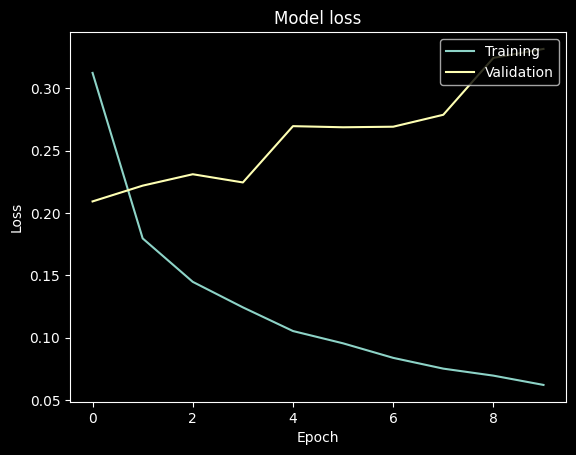

In [ ]:
# Loss graph
plt.style.use('dark_background')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper right')
plt.show()

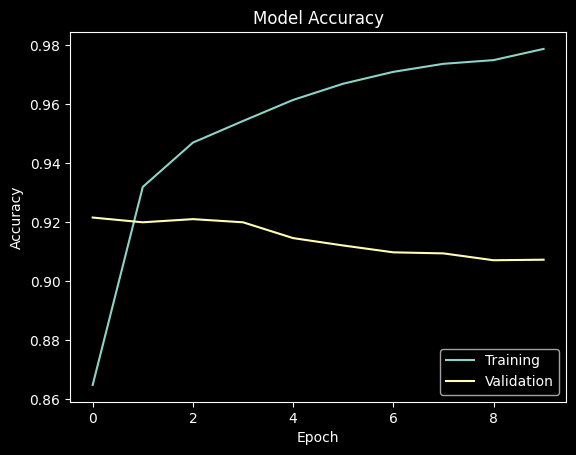

In [ ]:
# Accuracy graph
plt.style.use('dark_background')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'lower right')
plt.show()

In [ ]:
model.save("sentiment_model.h5")

In [ ]:
from keras.models import load_model
loaded_model = load_model("sentiment_model.h5")

In [ ]:
def preprocess_input(text):
    # Apply the same preprocessing steps as before
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(filtered_tokens)
    text = re.sub(r'http\S+|www\S+', '', text)
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text = ' '.join(lemmatized_tokens)
    return text

def predict_sentiment(text):
    preprocessed_text = preprocess_input(text)
    input_sequence = tokenizer.texts_to_sequences([preprocessed_text])
    padded_sequence = pad_sequences(input_sequence, maxlen=max_len)
    prediction = model.predict((padded_sequence))
    sentiment = "positive" if prediction[0] >= 0.5 else "negative"
    return prediction

# Sample prediction
diary_entry = "I am so sad"
prediction = predict_sentiment(diary_entry)
print("Sentiment prediction:", prediction)
#print("Model's prediction : ", )

1/1 [==============================] - 0s 104ms/step
Sentiment prediction: [[0.35598597]]


In [ ]:
import numpy as np

# Function to preprocess the text
#def preprocess_text(text):
    # Apply necessary preprocessing steps
    # ...

    #return preprocessed_text

# Function to make predictions
def predict_sentiment(text):
    # Preprocess the text
    processed_text = pre_process(text)

    # Tokenize and pad the text
    sequence = tokenizer.texts_to_sequences([processed_text])
    sequence = pad_sequences(sequence, maxlen=max_len)

    # Make the prediction
    prediction = model.predict(sequence)
    sentiment = 'Positive' if prediction > 0.5 else 'Negative'

    return sentiment

# Example diary entry
diary_entry = """
Dear Diary,

Today has been an incredible day filled with joy and happiness. From the moment I woke up, I felt a sense of excitement and positivity flowing through me. The sun was shining brightly, and the birds were singing their cheerful melodies.

I had a wonderful time with my loved ones. We spent the day outdoors, exploring nature and creating beautiful memories. We laughed, shared stories, and enjoyed each other's company. It's amazing how spending time with the people you love can uplift your spirits and bring immense happiness.

In the afternoon, I received some fantastic news. I achieved a significant milestone in my career that I had been working hard for. The feeling of accomplishment and pride overwhelmed me. It's a reminder that hard work and perseverance truly pay off, and it fills me with gratitude and satisfaction.

As the day went on, I couldn't help but appreciate the little things that brought me joy. The aroma of freshly brewed coffee, the vibrant colors of blooming flowers, and the gentle breeze against my skin. These simple pleasures reminded me to find happiness in the present moment and appreciate the beauty that surrounds me.

In the evening, I took some time for self-care. I indulged in my favorite hobby, painting. The act of creating something from a blank canvas brought me immense joy and allowed me to express my creativity freely. It's a therapeutic activity that nourishes my soul and brings a sense of peace and contentment.

Now, as I write this entry, I am filled with gratitude for this beautiful day. It's a reminder that happiness can be found in the simplest of things and that life is meant to be cherished and celebrated.

With a heart full of joy,
[Your Name]
"""

# Make the prediction
predicted_sentiment = predict_sentiment(diary_entry)

# Display the result
print(f"Predicted Sentiment: {predicted_sentiment}")


In [ ]:
# Contoh teks yang akan diprediksi
texts = ["I am happy", "I am sad"]

# Pra-pemrosesan teks
sequences = tokenizer.texts_to_sequences(texts)
processed_texts = pad_sequences(sequences, maxlen=max_len)

# Membuat prediksi
predictions = model.predict(processed_texts)

# Mengonversi nilai prediksi menjadi label
labels = ['Non-Depresi' if pred < 0.5 else 'Depresi' for pred in predictions]

# Menampilkan hasil prediksi
for i, text in enumerate(texts):
    print(f"Teks: {text}")
    print(f"Prediksi: {labels[i]}")
    print()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Menggunakan model untuk melakukan prediksi pada dataset
predictions = model.predict(dataset)
predicted_labels = np.argmax(predictions, axis=1)

# Membuat confusion matrix
CM = confusion_matrix(np.argmax(labels, axis=1), predicted_labels)

# Menampilkan confusion matrix
cmp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=['Positif', 'Negatif'])
cmp.plot(cmap='Blues')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Menampilkan akurasi dari model
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print(f"Training Accuracy: {accuracy[-1]}")
print(f"Validation Accuracy: {val_accuracy[-1]}")

# Menghitung presisi, recall, dan f1 score
precision = precision_score(np.argmax(labels, axis=1), predicted_labels)
recall = recall_score(np.argmax(labels, axis=1), predicted_labels)
f1 = f1_score(np.argmax(labels, axis=1), predicted_labels)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

##Naive Bayes

In [ ]:
X = dm['text_clean']
y = dm['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [ ]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc


In [ ]:
def train_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Evaluate the model
    accuracy = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Assuming X and y are your input data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the vectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and train the model
nb = MultinomialNB()
nb.fit(X_train_vectorized, y_train)

# Evaluate the model
accuracy = nb.score(X_test_vectorized, y_test)
print(f"Accuracy: {accuracy}")

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
from scikitplot.metrics import confusion_matrix, plot_roc_curve, roc_curve, auc

# Assuming you have already trained and evaluated your model, and you have the model object (nb) and the vectorized test data (X_test_vectorized, y_test)

# Plot ROC curve
y_prob = nb.predict_proba(X_test_vectorized)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
skplt.metrics.plot_roc(y_test, y_prob)
plt.title('ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.show()





In [ ]:
# Generate predictions
y_pred = nb.predict(X_test_vectorized)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import joblib

# Menyimpan model
joblib.dump(nb, 'sentiment_model.pkl')

# Memuat model
loaded_model = joblib.load('sentiment_model.pkl')

In [ ]:
def preprocess_input(text):
    # Apply the same preprocessing steps as done during training
    text_clean = pre_process(text)  # Assuming you have defined the pre_process function

    # Transform the preprocessed text using the vectorizer
    text_vectorized = vectorizer.transform([text_clean])

    return text_vectorized

# Example input text
input_text = "Today was a saddest day"

# Preprocess the input text and transform it
input_vectorized = preprocess_input(input_text)

# Make predictions
predictions = nb.predict(input_vectorized)

# Print the predicted label
print(f"Predicted Label: {predictions[0]}")


##percobaan ke-2 menggunakan indo dataset (belum berhasil)

In [ ]:
dm = pd.read_csv('/content/drive/Shareddrives/DearMe/Machine Learning/Dataset/Data10k_Csv.csv')

In [ ]:
dm.head()

,Unnamed: 0,tweet_id,length of word,location,username,tweet,deEmoji,cleanTweet,sentiment,date
0,0,1.330000e+18,115,Jawa Barat,mamake_iam,mungkin kau selalu menduga\r\ndiriku tak perna...,mungkin kau selalu menduga diriku tak pernah m...,mungkin kau selalu menduga diriku tidak pernah...,Terindikasi Depresi,11/18/2020 15:43
1,1,1.330000e+18,90,Jawa Barat,atdarebel_05,Aku tidak kehilangan seorang teman pun. Aku ha...,aku tidak kehilangan seorang teman pun aku ha...,aku tidak kehilangan seorang teman pun aku han...,Terindikasi Depresi,11/18/2020 15:41
2,2,1.330000e+18,268,Jawa Barat,wasikjogja,Manusia tidak akan pernah selesai dengan selur...,manusia tidak akan pernah selesai dengan selu...,manusia tidak akan pernah selesai dengan selur...,Tidak Terindikasi,11/18/2020 15:40
3,3,1.330000e+18,246,Jawa Barat,RifqiMI,Aku menyesal bahwa selama ini aku tidak pernah...,aku menyesal bahwa selama ini aku tidak perna...,aku menyesal bahwa selama ini aku tidak pernah...,Tidak Terindikasi,11/18/2020 15:39
4,4,1.330000e+18,162,Jawa Barat,bekna_sapa,Jangan pernah merasa sendiri lihatlah aku yang...,jangan pernah merasa sendiri lihatlah aku yan...,jangan pernah merasa sendiri lihatlah aku yang...,Terindikasi Depresi,11/18/2020 15:33


In [ ]:
dm.head()
dm.shape
X = dm.iloc[:, 7].values
y = dm.iloc[:, 8].values

In [ ]:
print('List of raw Tweet : ', X[0:5])
print('\n')
print('List of raw Target : ', y[0:5])

List of raw Tweet :  ['mungkin kau selalu menduga diriku tidak pernah memahamimu bahkan kau selalu curiga ada yang lain dan kuduakan cintamu'
 'aku tidak kehilangan seorang teman pun aku hanya baru sadar kalau tidak pernah memilikinya'
 'manusia tidak akan pernah selesai dengan seluruh pertengkaran dendam kebencian bully dan caci maki kalau hanya saling menyombongkan kebenaran masing-masing menuhankan kebenaran masing-masing cobalah merendah oh barangkali aku yang salah mereka yang benar'
 'aku menyesal bahwa selama ini aku tidak pernah berani melangkah untuk memulai hal yang baru tapi aku sangat bersyukur hingga saat ini aku selalu dibersamai dengan orang yang selalu mendorong untuk berani maju melangkah'
 'jangan pernah merasa sendiri lihatlah aku yang tidak pernah pergi dan selalu berusaha untuk ada disaat kamu sedih meskipun terkadang aku menjauh saat kamu senang']


List of raw Target :  ['Terindikasi Depresi' 'Terindikasi Depresi' 'Tidak Terindikasi'
 'Tidak Terindikasi' 'Terindi

In [ ]:
dm = dm.drop(['Unnamed: 0', 'tweet_id', 'length of word', 'location', 'username',	'tweet','date',	'deEmoji'], axis=1)

Text(0.5, 1.0, 'Sentiment Data Distribution')

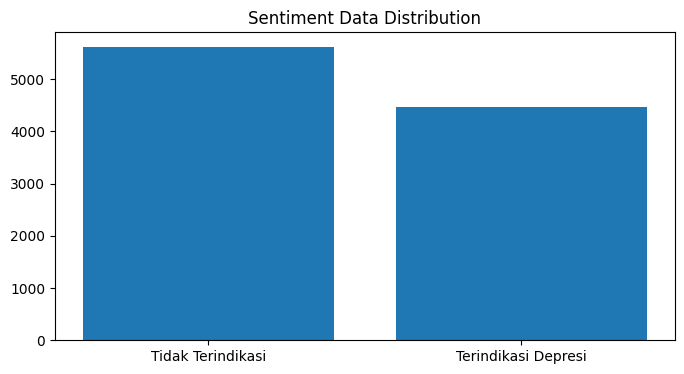

In [ ]:
val_count = dm.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [ ]:
import random
random_idx_list = [random.randint(1,len(dm.cleanTweet)) for i in range(10)] # creates random indexes to choose from dataframe
dm.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,cleanTweet,sentiment
6247,maaf aku mah tidak pernah merendah soalnya aku...,Terindikasi Depresi
4440,kita semua pernah salah tanpa disadari pernah...,Terindikasi Depresi
79,ternyata cewenya yang ngumbar kemana buat apa ...,Terindikasi Depresi
6626,ada manusia yang sangat sadar atas ketololanny...,Terindikasi Depresi
5246,kamu tau penyebab aku selalu sabar karena aku ...,Terindikasi Depresi
1362,aku tidak pernah bermain untuk hasil seri dala...,Tidak Terindikasi
8115,malesnya baca tuh ya gini untuk aku yang hampi...,Terindikasi Depresi
6293,buat cowo cowo yang care banget sama aku diban...,Tidak Terindikasi
3736,singkatnya kamu pernah ada bahkan cukup lama u...,Tidak Terindikasi
4794,ketika ada masalah melanda hubungan kita aku s...,Tidak Terindikasi


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('corpus')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading corpus: Package 'corpus' not found in index


False

In [ ]:
stop_words = stopwords.words('indonesian')


text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
!pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 12.5 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
dm.cleanTweet = dm.cleanTweet.apply(lambda x: preprocess(x))
dm.cleanTweet

0        kau menduga diriku memahamimu kau curiga kudua...
1                       kehilangan teman sadar memilikinya
2        manusia selesai pertengkaran dendam kebencian ...
3        menyesal berani melangkah bersyukur dibersamai...
4        lihatlah pergi berusaha disaat sedih terkadang...
                               ...                        
10077    krisna radha mencintai tulus merelakan menguba...
10078           om coach mengunjungi twittermu om block om
10079    paham motif pelaku pembantaian sigi berlatar a...
10080    thank mas esaa post foto wajahku low angle kal...
10081    dilupa apakahh jatuh cinta hahahaaa leluconn apaa
Name: cleanTweet, Length: 10082, dtype: object

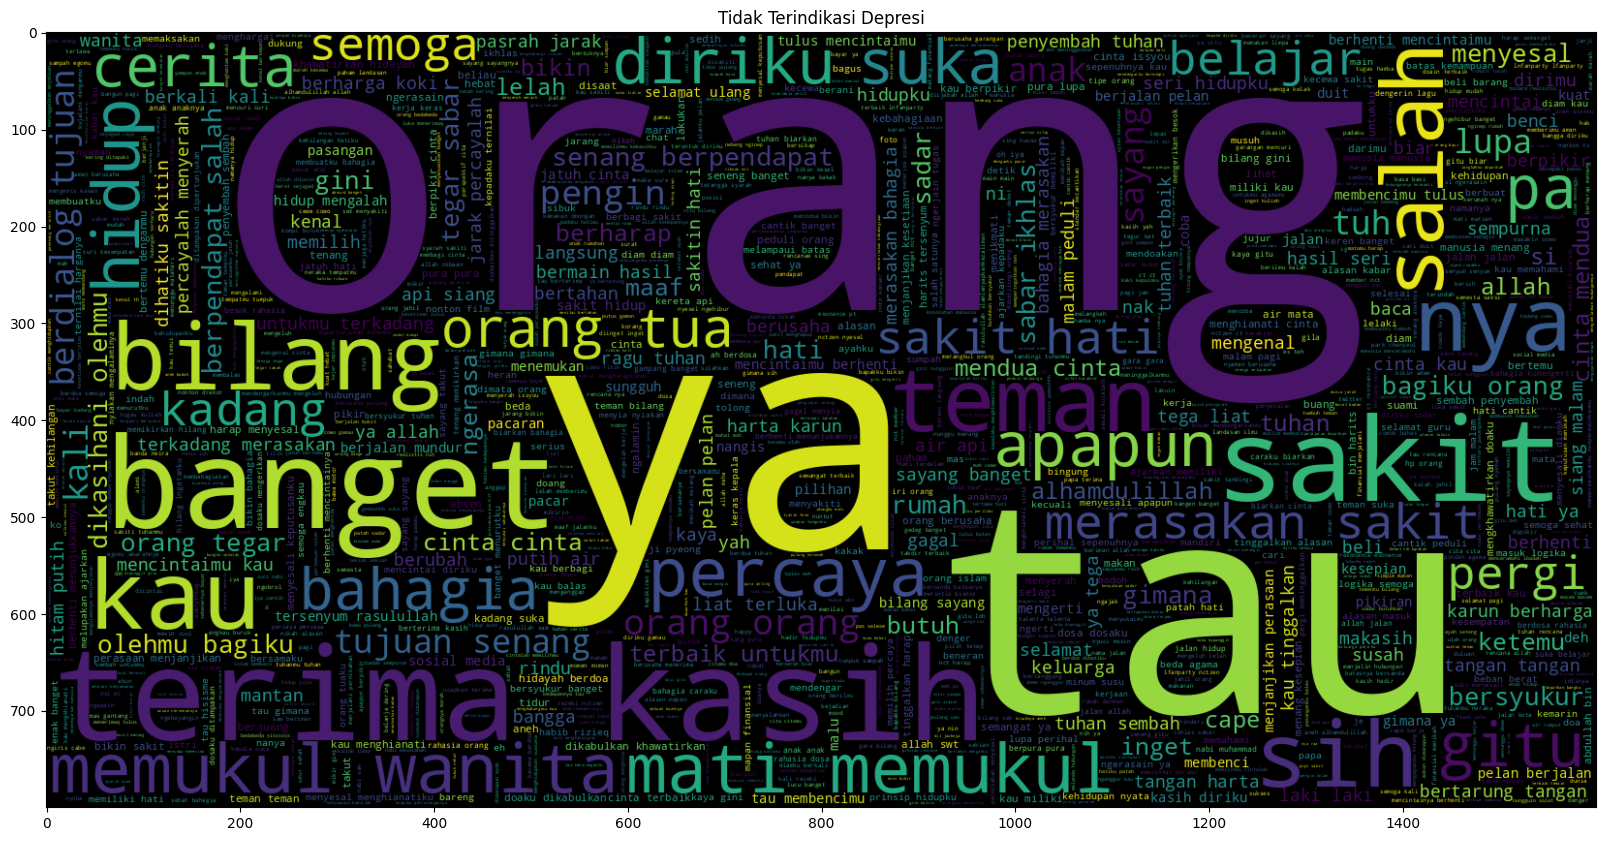

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dm[dm.sentiment == 'Tidak Terindikasi'].cleanTweet))
plt.title('Tidak Terindikasi Depresi')
plt.imshow(wc , interpolation = 'bilinear')

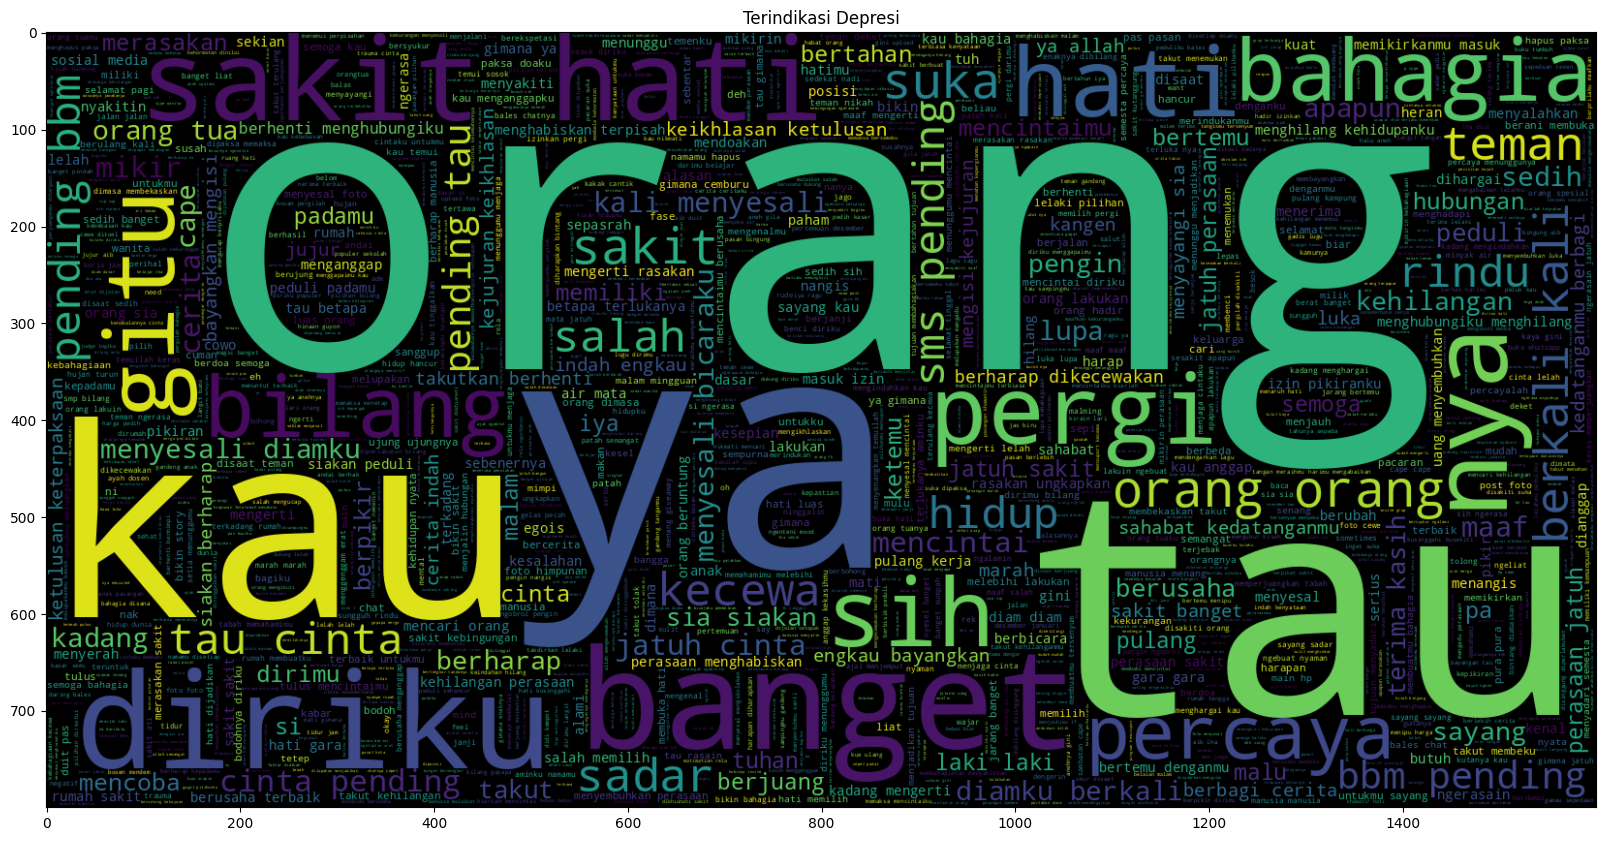

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dm[dm.sentiment == 'Terindikasi Depresi'].cleanTweet))
plt.title('Terindikasi Depresi')
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
from sklearn.preprocessing import LabelEncoder
a = LabelEncoder()
a.fit(dm['sentiment'])

dm['sentiment'] = a.transform(dm['sentiment'])
dm.head()

,cleanTweet,sentiment
0,kau menduga diriku memahamimu kau curiga kudua...,0
1,kehilangan teman sadar memilikinya,0
2,manusia selesai pertengkaran dendam kebencian ...,1
3,menyesal berani melangkah bersyukur dibersamai...,1
4,lihatlah pergi berusaha disaat sedih terkadang...,0


Text(0.5, 1.0, 'Sentiment Data Distribution')

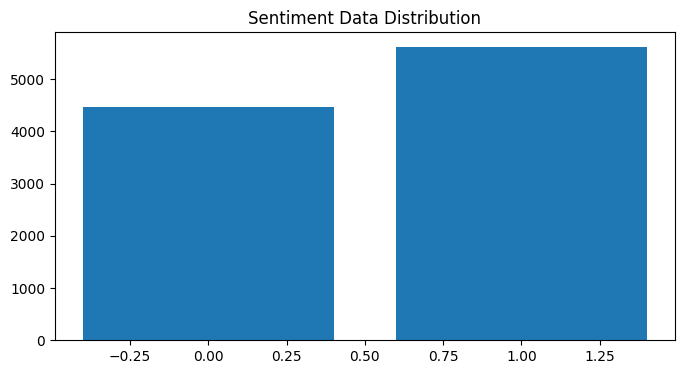

In [ ]:
val_count = dm.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [ ]:
data = dm['cleanTweet']
labels = np.array(dm['sentiment'])

# Split in training validation and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels,test_size=0.20,
                                                           random_state=42,
                                                           stratify = labels)

In [ ]:
print(X_train)

4931    sih nanya tujuanku sih malam tidur gitu muhasa...
799     patah mudah marah percayaku dilepas mentah men...
8386    gagal kumohon berlaku adil percayalah berhasil...
1838    akuin fandom kpop tuh solid banget berantem nu...
5087    tuhan menaruhku sisi diatas merendahkan dibawa...
                              ...                        
1682    apooo claim nama jalan pon nak letak nama jala...
5631    pasir membisikiku menyerah meraih mimpimu pert...
6741       menyesali diamku berkali kali menyesali bicara
2548     diomelin gara jalan jalan muka dirawat tau usaha
9392    berheti mencintaimu berhenti menunjukannya sep...
Name: cleanTweet, Length: 8065, dtype: object


In [ ]:
# lets take 10k words in num_words
tokenizer = Tokenizer(num_words=10000, oov_token = '<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)+1
VOCAB_SIZE

9846

In [ ]:
maxlen = max([len(x) for x in X_train]) # return 175 which is too big for tweets data.
maxlen = 50

In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded_sequences = pad_sequences(train_sequences,maxlen=maxlen,padding='post',truncating='post')
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded_sequences = pad_sequences(test_sequences,maxlen=maxlen,padding='post',truncating='post')

In [ ]:
len(train_padded_sequences[0])

50

In [ ]:
embedding_dim = 32

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(VOCAB_SIZE+1, embedding_dim, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.30),
        tf.keras.layers.Dense(embedding_dim,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.30),
        tf.keras.layers.Dense(8,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid'),
    ])

model.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            315104    
                                                                 
 bidirectional (Bidirectiona  (None, 32)               6272      
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 32)                1

In [ ]:
# Training the model we created above.
history =    model.fit(train_padded_sequences,
                                               y_train,
                                               validation_data = (test_padded_sequences, y_test),
                                               epochs = 3)

Epoch 1/3
253/253 [==============================] - 40s 94ms/step - loss: 0.6565 - accuracy: 0.6378 - val_loss: 0.6454 - val_accuracy: 0.5573
Epoch 2/3
253/253 [==============================] - 8s 32ms/step - loss: 0.3631 - accuracy: 0.8423 - val_loss: 0.3927 - val_accuracy: 0.8597
Epoch 3/3
253/253 [==============================] - 7s 26ms/step - loss: 0.1929 - accuracy: 0.9308 - val_loss: 0.8592 - val_accuracy: 0.6678


In [ ]:
print(X_test.iloc[99],'label: ;',y_test[99])

cemburu cemburu label: ; 1


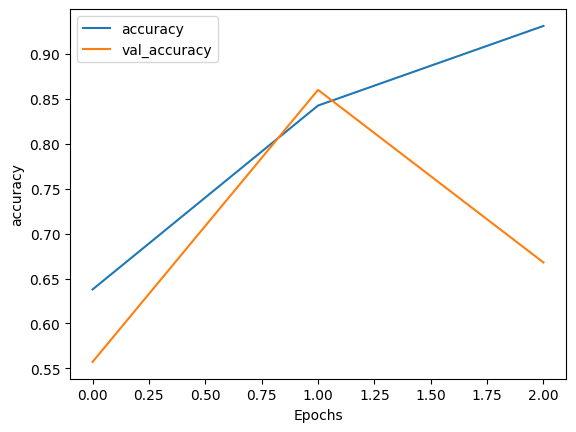

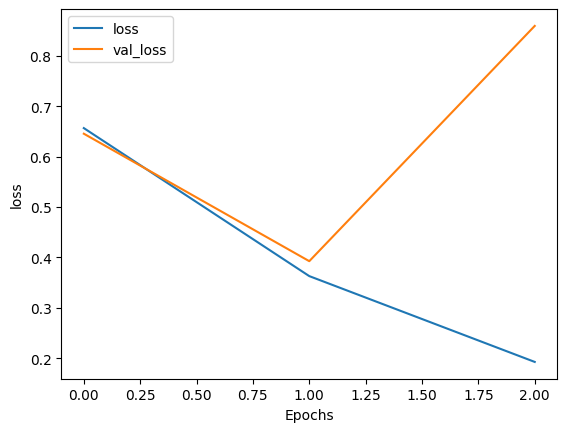

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(model, string):
  plt.plot(model.history[string])
  plt.plot(model.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# Example texts to predict
texts = ["bahagia", "aku sangat sedih sekali hari ini karena kucingku mati" , "senang", "kecewa", "depresi"]

# Preprocess the texts
processed_texts = tokenizer.texts_to_sequences(texts)
processed_texts = pad_sequences(processed_texts, maxlen=maxlen, padding='post', truncating='post')

# Make predictions
predictions = model.predict(processed_texts)

# Convert prediction values to labels
labels = ['Non-Depresi' if pred < 0.5 else 'Depresi' for pred in predictions]

# Display the prediction results
for i, text in enumerate(texts):
    print(f"Teks: {text}")
    print(f"Prediksi: {labels[i]}")
    print()

1/1 [==============================] - 0s 30ms/step
Teks: bahagia
Prediksi: Non-Depresi

Teks: aku sangat sedih sekali hari ini karena kucingku mati
Prediksi: Non-Depresi

Teks: senang
Prediksi: Non-Depresi

Teks: kecewa
Prediksi: Non-Depresi

Teks: depresi
Prediksi: Non-Depresi



In [ ]:
print(predictions)

[[0.0010449 ]
 [0.00045875]
 [0.03511582]
 [0.00240476]
 [0.00226522]]
